In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io
from tqdm import tqdm
import os
import spike
pd.options.mode.chained_assignment = None  # default='warn'

mouse_name = "ts11_V1"
date = "180424"
session_name = "ABABA"
#ts9_SC_180419_sine_grating

experiment_id = "{mouse}_{date}_{session}".format(mouse=mouse_name, date=date, session=session_name)
_data = os.path.join("data/3GratingSequence/SpikeTrain/", experiment_id)
_dir = os.path.join("data/3GratingSequence/CHART/", experiment_id)
_temp = "data/3GratingSequence/temp"
if not os.path.isdir(_dir):
    os.mkdir(_dir)
    
#trim the marker dataframe into desired format.
# marker_table = pd.read_csv(_data+'.csv')
#trim = marker_table[marker_table.colorname!='black'].copy(deep=True)
#trim = marker_table[marker_table.marker!='gray'].copy(deep=True)
#trim.columns = ['time','marker']
#trim.index = np.arange(0,len(trim))
# trim

spike_trains, spike_marker = spike.import_spike_train_data(session=session_name, mouse_id=mouse_name, 
                              mat=_data+".mat",data_dir='.',
                              csv=_data+'.csv', chunker_args={'skip':['START','QUIT','gray']})
list(spike_trains.keys())

marker shift: 250


['WBC02a',
 'WBC02b',
 'WBC03a',
 'WBC04a',
 'WBC04b',
 'WBC05a',
 'WBC06a',
 'WBC07a',
 'WBC07b',
 'WBC10a',
 'WBC10b',
 'WBC10c',
 'WBC10d',
 'WBC11a',
 'WBC11b',
 'WBC12a',
 'WBC12b',
 'WBC13a',
 'WBC13b',
 'WBC14a',
 'WBC15a',
 'WBC15b',
 'WBC16a',
 'WBC16b']

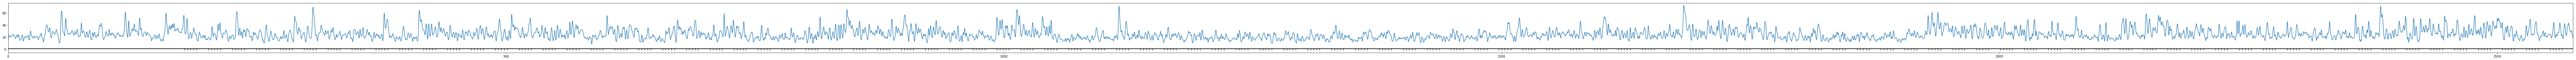

In [33]:
target_channel = 'WBC04a'

kernel = spike.kernel('gaussian',sigma=0.4)
step = 0.1 # second

train = spike_trains[target_channel].spike_train
spike.tools.previewSingleChannel(train,
                                spike.apply_linear_filter(train, kernel, nbins=10000),
                                spike_marker.table_marker.time,
                                size=(150,3),
                                xlims=(0, int(train[-1])))
#plt.savefig(os.path.join(_temp, experiment_id+'_'+target_channel+'_full.png'), bbox_inches='tight')

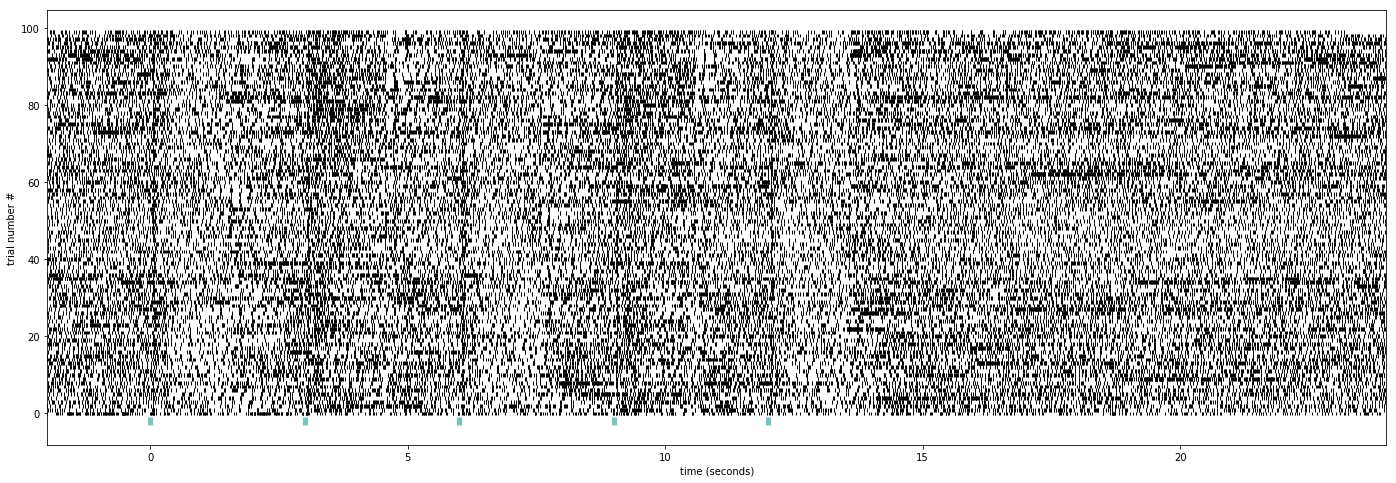

In [35]:
target_channel = 'WBC04a'
roi = (-2, 24, (0, 3, 6, 9, 12))
train = spike_trains[target_channel].spike_train



spike.tools.singleChannelExam.previewSingleChannel_aligned(train, 
                                                          spike_marker.table_marker.time[::5].values,
                                                          roi, size=(24,8), width=1)
# plt.savefig(os.path.join(_temp, experiment_id+'_'+target_channel+'_aligned.png'), bbox_inches='tight')

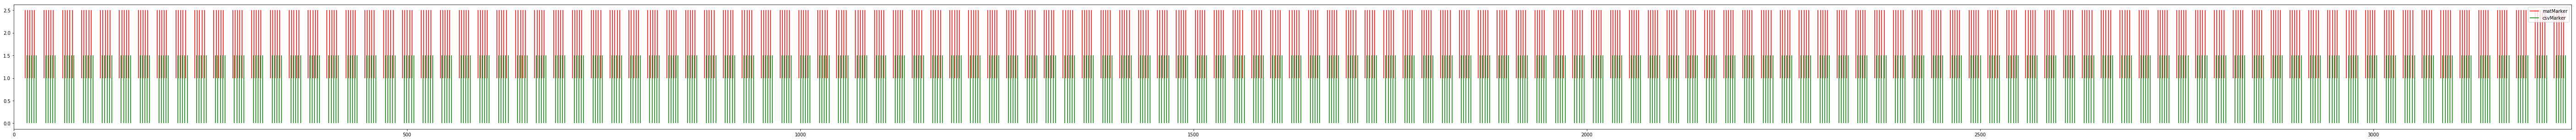

In [27]:
# marker validity test

import h5py, scipy.io
with h5py.File(_data+".mat","r") as f:
    csvMarker = f.get('DIG01')['times'].value[0]
#_raw_data = scipy.io.loadmat(_data+".mat")
#csvMarker = _raw_data['DIG01']['times'][0][0].transpose()[0]
marker_table = pd.read_csv(_data+'.csv')



spike.markerPlot(csvMarker, marker_table[marker_table.marker!='gray'].time.values[1:-2])
plt.show()